<a href="https://colab.research.google.com/github/Deep-Learning-Challenge/challenge-notebooks/blob/master/2.Convolutional%20Neural%20Networks/1.Lessons/2.Improve%20Model%20Performance%20With%20Image%20Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

# Improve Model Performance With Image Augmentation

Data preparation is required when working with neural networks and deep learning models. Increasingly data augmentation is also needed on more complex object recognition tasks. In this lesson, you will discover how to use data preparation and data augmentation with your image datasets when developing and evaluating deep learning models in Python with Keras. After completing this lesson, you will know:

* About the image augmentation API provided by Keras and how to use it with your models.
* How to perform feature standardization.
* How to perform ZCA whitening of your images.
* How to augment data with random rotations, shifts, and flips of images.
* How to save augmented image data to disk.

Let's get started.

## Keras Image Augmentation API

Like the rest of Keras, the image augmentation API is simple and powerful. Keras provides the ***ImageDataGenerator*** class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

* Feature-wise standardization.
* ZCA whitening.
* Random rotation, shifts, shear, and flips.
* Dimension reordering.
* Save augmented images to disk.

An augmented image generator can be created as follows:

`datagen = ImageDataGenerator()`

Rather than performing the operations on your entire image dataset in memory, the API is designed to be iterated by the deep learning model fitting process, creating augmented image data for you just-in-time. This reduces your memory overhead but adds some additional time cost during model training. After you have created and configured your ***ImageDataGenerator***, you must fit it on your data. This will calculate any statistics required to perform the transforms to your image data. You can do this by calling the `fit()` function on the data generator and pass it to your training dataset.

`datagen.fit(train)`

The data generator itself is, in fact, an iterator, returning batches of image samples when requested. We can configure the batch size, prepare the data generator and get batches of images by calling the `flow()` function.

`X_batch, y_batch = datagen.flow(train, train, batch_size=32)`

Finally, we can make use of the data generator. Instead of calling the `fit()` function on our model, we must call the `fit_generator()` function and pass in the data generator and the the desired length of an epoch as well as the total number of epochs on which to train.

`fit_generator(datagen, samples_per_epoch=len(train), epochs=100)`

You can learn more about the Keras image data generator API in the Keras documentation.

## Point of Comparison for Image Augmentation

Now that you know how the image augmentation API in Keras works let's look at some examples. We will use the MNIST handwritten digit recognition task in these examples. To begin, let's take a look at the first nine images in the training dataset.

2021-11-03 22:26:36.503176: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-03 22:26:36.503220: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


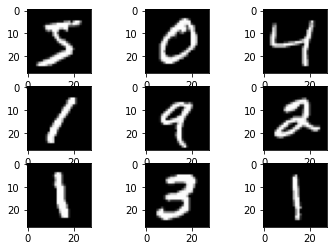

In [1]:
import tensorflow as tf

#Plot of images as baseline for comparison
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

# show the plot
pyplot.show()

Running the example provides the image above that we can use to compare with the image preparation and augmentation tasks in the examples below.

## Feature Standardization

It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset. This is different to sample standardization described in the previous section as pixel values are standardized across all samples (all images in the dataset). In this case, each image is considered a feature. You can perform feature standardization by setting the `featurewise_center` and `featurewise_std_normalization` arguments on the ***ImageDataGenerator*** class.

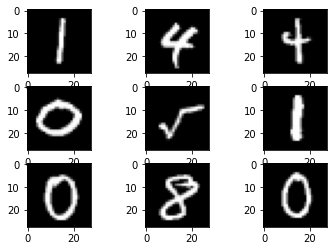

In [2]:
# Standardize images across the dataset, mean=0, stdev=1
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(
    featurewise_center=True, 
    featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    
    # show the plot
    plt.show()
    break

Running this example, you can see the effect on the actual images, seemingly darkening and lightening different digits.

## ZCA Whitening

A whitening transform of an image is a linear algebra operation that reduces the pixel images' matrix redundancy. Less redundancy in the image is intended to highlight better the image's structures and features to the learning algorithm. Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an
alternative called ZCA (learn more in Appendix A of this tech report2) shows better results and results in transformed images that keep all of the original dimensions and, unlike PCA, resulting in transformed images that still look like their originals. You can perform a ZCA whitening transform by setting the `zca_whitening` argument to `True`.

/usr/local/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


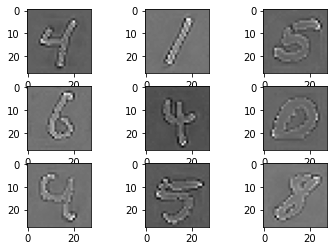

In [3]:
# ZCA whitening
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    
    # show the plot
    plt.show()
    break

Running the example, you can see the same general structure in the images and how each digit's outline has been highlighted.

## Random Rotations

Sometimes images in your sample data may have varying and different rotations in the scene. You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training. The example below creates random rotations of the MNIST digits up to 90 degrees by setting the `rotation_range` argument.

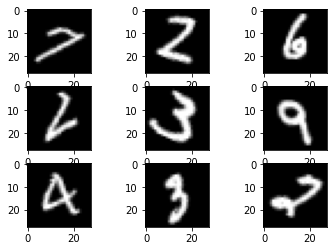

In [6]:
# Random Rotations
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(rotation_range=30)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    
    # show the plot
    pyplot.show()
    break

Running the example, you can see that images have been rotated left and right up to a limit of 90 degrees. This is not helpful because the MNIST digits have a normalized orientation, but this transform might help when learning from photographs where the objects may have different orientations.

## Random Shifts

Objects in your images may not be centered in the frame. They may be off-center in a variety of different ways. You can train your deep learning network to expect and currently handle off-center objects by artificially creating shifted versions of your training data. Keras supports separate horizontal and vertical random shifting of training data by the `width_shift_range` and `height_shift_range` arguments.

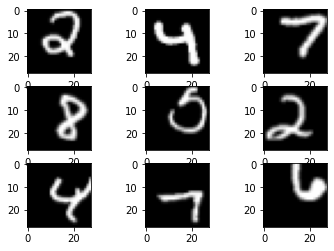

In [7]:
# Random Shifts
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    
    # show the plot
    plt.show()
    break

Running this example creates shifted versions of the digits. Again, this is not required for MNIST as the handwritten digits are already centered, but you can see how this might be useful on more complex problem domains.

## Random Flips

Another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data. Keras supports random flipping along both the vertical and horizontal axes using the `vertical_flip` and `horizontal_flip` arguments.

/usr/local/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:938: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn(
/usr/local/lib/python3.9/site-packages/keras_preprocessing/image/numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


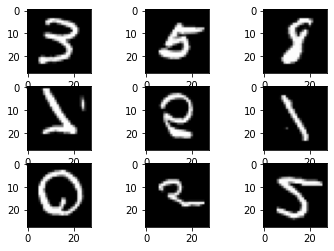

In [8]:
# Random Shifts
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    
    # show the plot
    plt.show()
    break

Running this example, you can see flipped digits. Flipping digits in MNIST is not useful as they will always have the correct left and right orientation, but this may be useful for problems with photographs of objects in a scene that can have a varied orientation.

## Saving Augmented Images to File

The data preparation and augmentation are performed just-in-time by Keras. This is efficient in terms of memory, but you may require the exact images used during training. For example, perhaps you would like to use them with a different software package later or only generate them once and use them on multiple deep learning models or configurations.

Keras allows you to save the images generated during training. The directory, filename prefix, and image file type can be specified to the `flow()` function before training. Then, during training, the generated images will be written to file. The example below demonstrates this and writes nine images to an `images` subdirectory with the prefix `aug` and PNG file type.

/usr/local/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


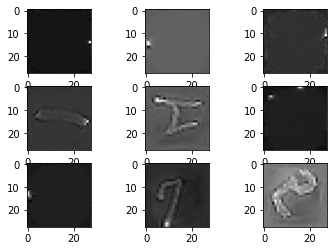

In [10]:
# Random Shifts
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
shift = 0.1
datagen = ImageDataGenerator(
    featurewise_center=True, 
    featurewise_std_normalization=True,
    rotation_range=90,
    horizontal_flip=True, 
    vertical_flip=True,
    width_shift_range=shift, 
    height_shift_range=shift,
    #zca_whitening=True
)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
if not os.path.exists('images'):
    os.makedirs('images')

for X_batch, y_batch in datagen.flow(X_train, 
                                     y_train, 
                                     batch_size=9, 
                                     save_to_dir='images', 
                                     save_prefix='aug', 
                                     save_format='png'):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    
    # show the plot
    plt.show()
    break

Running the example, you can see that images are only written when they are generated.

## Tips For Augmenting Image Data with Keras

Image data is unique in that you can review the transformed copies of the data and quickly get an idea of how your model may perceive the inputs. Below are some tips for getting the most from image data preparation and augmentation for deep learning.

* **Review Dataset**. Take some time to review your dataset in great detail. Look at the images. Take note of image preparation and augmentations that might benefit your model's training process, such as the need to handle different shifts, rotations, or flips of objects in the scene.
* **Review Augmentations**. Review sample images after the augmentation have been performed. It is one thing to know what image transforms you are using intellectually, it is a very different thing to look at examples. Review images both with individual augmentations you are using and the full set of augmentations you plan to use in aggregate. You may see ways to simplify or further enhance your model training process.
* **Evaluate a Suite of Transforms**. Try more than one image data preparation and augmentation scheme. Often you can be surprised by the results of a data preparation scheme you did not think would be beneficial.

## Summary

In this lesson, you discovered image data preparation and augmentation. You discovered a range of techniques you can use easily in Python with Keras for deep learning models. You learned about:

* The ***ImageDataGenerator*** API in Keras for generating transformed images just-in-time.
* Feature-wise pixel standardization.
* The ZCA whitening transform.
* Random rotations, shifts, and flips of images.
* How to save transformed images to file for later reuse.